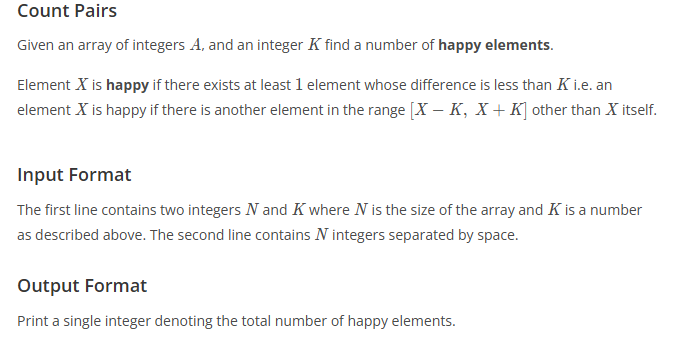

input = len(A) target
- 6 3
- 5 5 7 9 15 2
 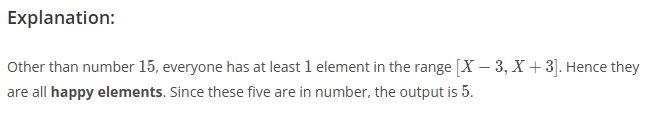
 out put 5 = there are five elemnts in the array which are happy 


# solution   approach 1  
#### using the map function 
- The map() function in Python is a built-in function that applies a given function to each item of an iterable (such as a list, tuple, or string) and returns an iterator with the results.

- n,k = list(map(int,input().split()))  it means :
1. input().split()  : takes the user input as a string and splits it into a list of strings, using whitespace (space, tab, newline, etc.) as the delimiter.
2. map(int, input().split())  : applies the int() function to each item in the list returned by input().split(), effectively converting each string to an integer.
3. list(map(int, input().split())) :  converts the map object (which is an iterator) into a list of integers.
4. Finally, n, k = ... unpacks the list of integers into two separate variables, n and k.



In [ ]:
# : Explanation of the Brute Force Solution
n, k = list(map(int,input().split()))
array = list(map(int,input().split())) 

count = 0
for i in range(n): # Loop through each element array[i].
    for j in range(n):
        # Check every other element array[j]   Check every other element array[j]
        if j != i and abs(array[i]-array[j]) <= k and array[i] != array[j]: # must be a different element
            count += 1
            break  

print(count)
# t =   O(N^2)
# We increment count once for this element.

#Break → stop checking further for i since we only need existence, not number of neighbors.#


In [ ]:
n, k = map(int, input().split())
arr = list(map(int, input().split()))

if k==0:
    print ("0")
else:            # Sorting makes sure closest numbers are next to each other.           
    arr.sort()      #If two numbers can make each other happy, they will be adjacent in sorted order.
    happy = [False] * n

    # Only need to check neighbors in the sorted array.
    #If arr[i] and arr[i+1] are within k, then both are happy
    for i in range(n - 1):
        if abs(arr[i] - arr[i + 1]) <= k:
            happy[i] = True
            happy[i + 1] = True
    
    print(sum(happy))

    #orting + adjacency check  O(N log N)


In [ ]:
# CP solutoin
from collections import defaultdict

size, kval = map(int, input().split())
array = list(map(int, input().split()))

# Step 1: Build frequency of input numbers
freq = defaultdict(int)
for num in array:
    freq[num] += 1

# Step 2: Build difference array logic for range tracking
diff = defaultdict(int)

for num in array:
    left = num - kval
    right = num + kval

    diff[left] += 1
    diff[right + 1] -= 1
    diff[num] -= 1     # exclude the element itself
    diff[num + 1] += 1

# Step 3: Sort keys and compute prefix sum (range coverage)
points = sorted(set(diff.keys()) | set(freq.keys()))
active = 0
coverage = {}

for x in points:
    active += diff[x]
    coverage[x] = active

# Step 4: Count how many elements are covered
happy = 0
for x in array:
    if coverage.get(x, 0) > 0:
        happy += 1

print(happy)

1. we count how many times each number occurs.
Why? Because if the same number occurs more than once, it automatically makes those occurrences happy (since they have another equal neighbor within K).


Step 2: Range update using difference array
Here they apply the difference array (prefix sum trick) to mark ranges.
- [num - K, num + K] is the range of neighbors for num.
- They increment diff[left] and decrement diff[right+1] → this marks the valid interval.
- But since we must exclude num itself, they subtract coverage at num and re-add at num+1.
👉 This ensures only "other numbers" in the range are counted, not the element itself.


Step 3: Compute prefix sums (coverage map)
- Now they sweep across all points:
- active tracks how many intervals currently cover x.
- coverage[x] tells how many other numbers fall into x's happy range.

### 🔹 Why This Approach is Good

Instead of checking all pairs (O(N²)), it uses:

- Difference array trick → O(N + M log M), where M = distinct values.

- Efficient even for large inputs.

- It systematically marks intervals instead of brute force searching.

In [ ]:
# function wise good looking solution 
n, k = list(map(int, input().split()))
arr = list(map(int, input().split()))

def getRange(x,k):
    return [x-k, x+k]
    
def inRange(x, y, arr, cur):
    for el in arr:
        if el>=x and el<=y and el!=cur:
            return True 
    return False
    
def main():
    allRange = [getRange(el, k) for el in arr]
    count = 0
    for cur, range in zip(arr, allRange):
        x, y = range 
        if inRange(x, y, arr, cur):
            count+=1 
        else:
            pass
    return count
    
if __name__ == "__main__":
    print(main())